# Evolutionary Dynamics

This is part of **part 3** of Nathaniel Virgo's lectures on population dynamics and evolutionary dynamics, as part of the ELSI course.

---

You can download this notebook and run it locally if you have Python installed, but you can also access it online at [https://nathanielvirgo.github.io/shared-notebooks/lab?path=Evolutionary+Dynamics.ipynb](https://nathanielvirgo.github.io/shared-notebooks/lab?path=Evolutionary+Dynamics.ipynb)

or

# https://shorturl.at/jkovx

If you're viewing this online you can edit the document and run Python code. Your edits will only exist in your browser's cache - other people can't see them.

It's better to use a recent version of Chrome or Firefox when viewing this notebook. If you have problems, try using Chrome.

To run Python code, hold shift and press enter. If you run each cell in sequence, it should re-create all the graphs. If you get an error it probably means you have to run one of the other cells first.

---

If you're using the online version, when you first open this file, select "Run all cells" from the "Run" menu above. This should solve any issues with getting the code to run.

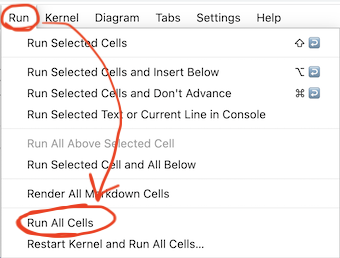

# Important information

There was a bug in the code for the assignment. This means that **the code did not behave correctly** when you tried to change the initial conditions.

I posted a corrected version at this link:

https://nathanielvirgo.github.io/shared-notebooks/lab?path=Population+dynamics+Assignment.ipynb

However, it looks like some people used the previous version, which was included in the Population Dynamics I lecture.

Rest assured that I will mark the assignment in a way that does not penalise anyone for that. However, if you want to make sure you understand the material please check the link above and see how it behaves when you change the initial conditions.


# Lotka-Volterra competition equations

These are the same competition equations we studied before, but with different names for the parameters.
 
 * Species 1 can reproduce on their own without species 2
 * and also species 2 can reproduce on their own without species 1
 * Species 2 has a *negative* effect on species 1
 * and also species 1 has a *negative* effect on species 2
 * both species have a negative effect on themselves
  
This gives the equations (eq. 3.8 in the book)


$$
\frac{\mathrm{d}x_1}{\mathrm{d}t} = x_1(b_1 - a_{11}x_1 - a_{12}x_2) \\[1em]
\frac{\mathrm{d}x_2}{\mathrm{d}t} = x_2(b_2 - a_{21}x_1 - a_{22}x_2)
$$

where we interpret the parameters as follows:

 * $b_1$ - intrinsic growth rate of species 1
 * $a_{11}$ - intraspecific competition term for species 1
 * $a_{12}$ - the negative effect of species 2 on species 1

 * $b_2$ - intrinsic growth rate of species 2
 * $a_{21}$ - the negative effect of species 1 on species 2
 * $a_{22}$ - intraspecific competition term for species 2


The isoclines are given by

$$
b_1 - a_{11}x_1 - a_{12}x_2 = 0
$$

and

$$
b_2 - a_{21}x_1 - a_{22}x_2 = 0
$$

Now let's plot it. The behaviour depends on the parameters - I'll write a function so we can play with the parameters

In [26]:
# setup code - run this first.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [10, 10]

# a convenient function for plotting - put the axes at x=0, y=0.
def center_axes():
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    
    
# helper function
def rand_range(low, hi):
    return np.random.random()*(hi-low) + low

# a version that's biased toward the low end, which makes better plots
def rand_range_biased(low, hi):
    return np.random.random()*(np.random.random()*0.5+0.5)*(hi-low) + low


def plot_competition(a, b, c, d, e, f, x_range, y_range):
    # a, b, c, d, e, f are the parameters
    # x_range and y_range should be of the form [min_x, max_x] and [min_y, max_y].
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    
    for i in range(15):
        # solve and plot the equations from a few random starting points
        
        def lotka_volterra_competition(t, state):
            x, y = state
            dx = x*(a - b*x - c*y)
            dy = y*(d - e*x - f*y)
            return [dx,dy]

        t_span = (0.0,80.0)
        t_points = np.linspace(t_span[0], t_span[1], 1000)

        initial_state = [rand_range_biased(*x_range), rand_range_biased(*y_range)]

        result = solve_ivp(lotka_volterra_competition, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)
        
        plt.plot(result.y[0,:], result.y[1,:])
    

    # x isocline
    x = np.array([0.1,20])
    y = (a-b*x)/c 
    plt.plot(x,y,'k:',label="$dx_1/dt=0$",scalex=False, scaley=False)

    # y isocline
    x = np.array([0.1,20])
    y = (d-e*x)/f
    plt.plot(x,y,'k--',label="$dx_2/dt=0$",scalex=False, scaley=False)

    plt.xlabel("Species 1")
    plt.ylabel("Species 2")
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    center_axes()
    plt.legend()
    plt.show()

First we see what happens if two species are the same. Then we will try changing one slightly.

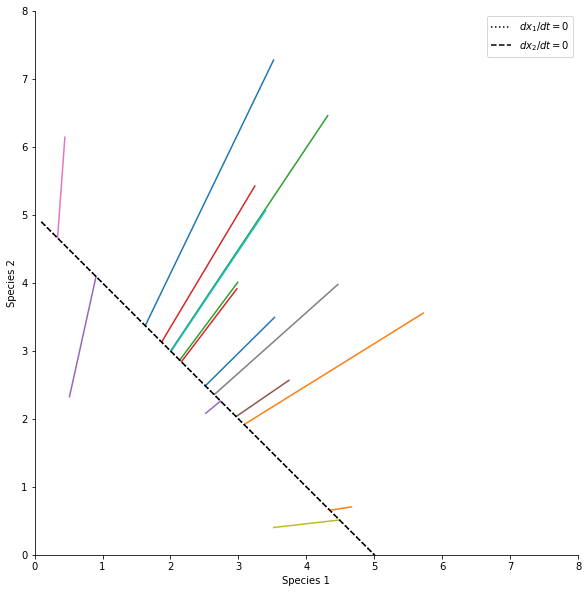

In [27]:
# intrinsic growth rates
b1 = 1
b2 = 1

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.2


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Next let's see what happens if species 2 (the mutant) has a higher growth rate

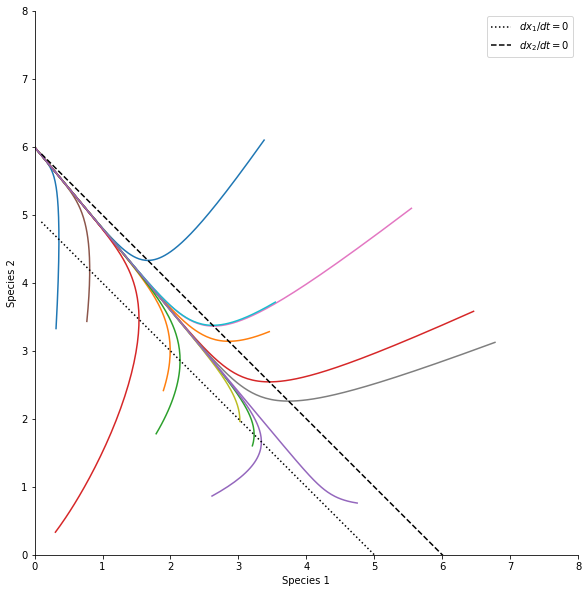

In [44]:
# intrinsic growth rates
b1 = 1
b2 = 1.2

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.2


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Sometimes there is a trade-off. A mutation might increase the growth rate, but also increase intraspecific competition, for example. Here's what happens:

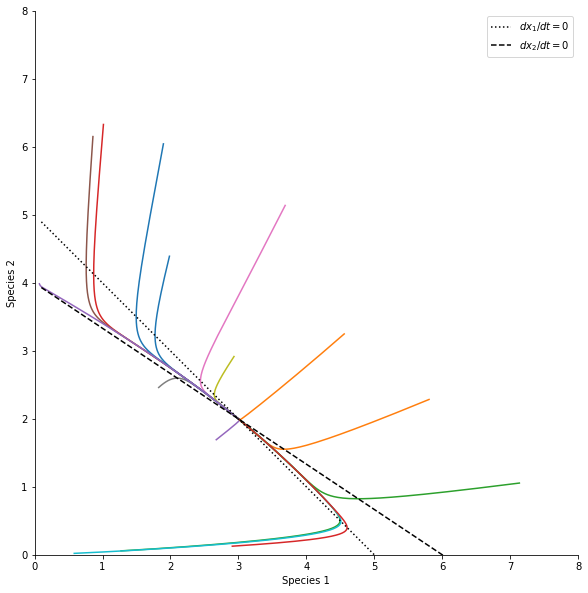

In [45]:
# intrinsic growth rates
b1 = 1
b2 = 1.2

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.3


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

In this case, the mutant can invade but it doesn't go to fixation. Instead, both types coexist.

Another mutation might do the opposite, decreasing growth rate but increasing intraspecific competition:

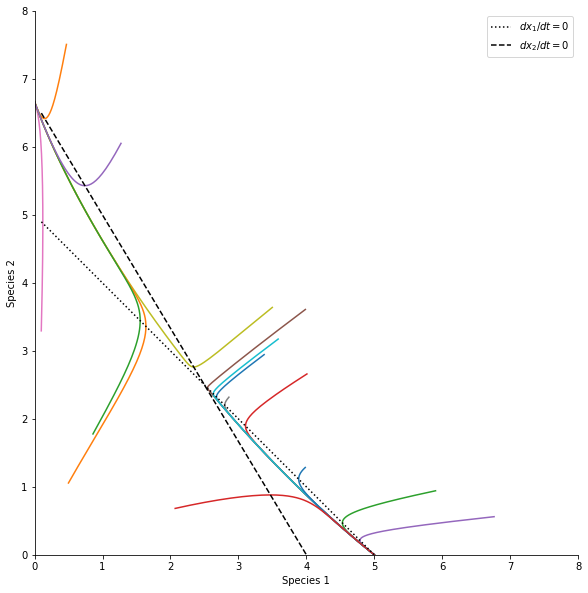

In [48]:
# intrinsic growth rates
b1 = 1
b2 = 0.8

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.12


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Now the mutant can't invade, so it will go extinct, even though its carrying capacity is higher than the original type.